## ***SEMI-SUPERVISED LEARNING : SELF-TRAINING***

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("datasets/cleaned_online_sex_work.csv")
df.head()

,User_ID,Female,Age,Location,Verification,Heterosexual,Homosexual,bicurious,bisexual,Dominant,...,Member_since_month,Member_since_day,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Number of Friends,Profile_pictures,Friends_ID_list,Risk
0,10386,False,34.6,A,False,0,1,0,0,0,...,9,17,32,2,0,0,1,0,18260,0.0
1,14,False,32.2,J,False,1,0,0,0,1,...,11,1,710,225,9,0,7,0,"11778,32024,43768,23969,27318,45884,31277",0.0
2,16721,False,33.6,K,False,1,0,0,0,1,...,4,1,25,135,1,1,3,45,"19805,21721,19802",0.0
3,16957,False,34.0,H,False,1,0,0,0,1,...,4,8,107,21562,1,0,12,1,"40847,38183,9507,42259,5807,28118,24848,37170,...",0.0
4,17125,False,39.5,B,False,1,0,0,0,1,...,4,14,600,21,0,6,35,8,"1320,35739,34231,19097,20197,18069,12330,43342...",0.0


In [3]:
df.isna().sum()

User_ID                                    0
Female                                     0
Age                                        0
Location                                   0
Verification                               0
Heterosexual                               0
Homosexual                                 0
bicurious                                  0
bisexual                                   0
Dominant                                   0
Submisive                                  0
Switch                                     0
Men                                        0
Men_and_Women                              0
Nobody                                     0
Nobody_but_maybe                           0
Women                                      0
Points_Rank                                0
Last_login                                 0
Member_since_year                          0
Member_since_month                         0
Member_since_day                           0
Number_of_

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   User_ID                              28831 non-null  int64  
 1   Female                               28831 non-null  bool   
 2   Age                                  28831 non-null  float64
 3   Location                             28831 non-null  object 
 4   Verification                         28831 non-null  bool   
 5   Heterosexual                         28831 non-null  int64  
 6   Homosexual                           28831 non-null  int64  
 7   bicurious                            28831 non-null  int64  
 8   bisexual                             28831 non-null  int64  
 9   Dominant                             28831 non-null  int64  
 10  Submisive                            28831 non-null  int64  
 11  Switch                      

#### Converting bool, object types to int/float

#### Female, Verification

In [5]:
truth_map = {True: 1, False: 0}

df['Female'] = df['Female'].map(truth_map)
df['Verification'] = df['Verification'].map(truth_map)


#### Location

In [6]:
df['Location'].value_counts()

A                     10945
B                      3572
G                      2211
L                      2210
M                      1261
K                      1209
C                      1176
H                      1167
E                       951
O                       892
J                       849
F                       822
N                       623
S                       484
D                       455
A kraj                    2
Jihomoravsk_ý kraj        1
South Moravian            1
Name: Location, dtype: int64

In [7]:
#too many categories, so we take the top 10 and make dummies
top_10 = df['Location'].value_counts().head(10).index.to_list()
top_10

['A', 'B', 'G', 'L', 'M', 'K', 'C', 'H', 'E', 'O']

In [8]:
def dummies(d, var, top10):
    for label in top10:
        d[var+'_'+label] = np.where(df[var] == label, 1, 0)


In [9]:
dummies(df, 'Location', top_10)
df.drop('Location', axis = 1, inplace = True)

#### Freinds_ID_List

In [10]:
# Not particlarly useful, but number of friends may be useful

def transform_id_list(x):
    if (isinstance(x, str)):
        return len(x.split(','))
    else:
        return 0;

In [11]:
df['Friends'] = df['Friends_ID_list'].apply(lambda x: transform_id_list(x))
df = df.drop('Friends_ID_list', axis = 1)

In [12]:
df['Friends'].value_counts()

0      25518
1       1662
2        598
3        313
4        164
5        128
6         74
7         52
9         45
8         44
11        32
12        22
13        21
17        20
10        15
18        11
14         9
25         8
15         8
16         7
20         7
21         6
23         6
19         6
30         5
22         4
26         4
31         4
32         4
24         4
29         3
27         3
33         3
37         2
35         2
44         2
34         2
39         1
65         1
46         1
41         1
50         1
98         1
28         1
143        1
51         1
92         1
70         1
38         1
49         1
Name: Friends, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   User_ID                              28831 non-null  int64  
 1   Female                               28831 non-null  int64  
 2   Age                                  28831 non-null  float64
 3   Verification                         28831 non-null  int64  
 4   Heterosexual                         28831 non-null  int64  
 5   Homosexual                           28831 non-null  int64  
 6   bicurious                            28831 non-null  int64  
 7   bisexual                             28831 non-null  int64  
 8   Dominant                             28831 non-null  int64  
 9   Submisive                            28831 non-null  int64  
 10  Switch                               28831 non-null  int64  
 11  Men                         

### Data pre-processing is done!

## Semi-supervised learning with ANN:

In [14]:
df.isna().sum()

User_ID                                    0
Female                                     0
Age                                        0
Verification                               0
Heterosexual                               0
Homosexual                                 0
bicurious                                  0
bisexual                                   0
Dominant                                   0
Submisive                                  0
Switch                                     0
Men                                        0
Men_and_Women                              0
Nobody                                     0
Nobody_but_maybe                           0
Women                                      0
Points_Rank                                0
Last_login                                 0
Member_since_year                          0
Member_since_month                         0
Member_since_day                           0
Number_of_Comments_in_public_forum         0
Time_spent

### Target column 'Risk' is majorly null, so we apply semi-supervised learning

In [15]:
labelled_df = df.dropna()
labelled_df

,User_ID,Female,Age,Verification,Heterosexual,Homosexual,bicurious,bisexual,Dominant,Submisive,...,Location_B,Location_G,Location_L,Location_M,Location_K,Location_C,Location_H,Location_E,Location_O,Friends
0,10386,0,34.6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14,0,32.2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7
2,16721,0,33.6,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3
3,16957,0,34.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,12
4,17125,0,39.5,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,5782,0,29.9,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
86,6035,0,52.3,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87,6288,1,28.8,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
88,9383,1,34.2,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,21


In [16]:
df.drop('User_ID', axis = 1, inplace = True)

In [17]:
labelled_df['Risk'].value_counts()

0.0    57
1.0    33
Name: Risk, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X = labelled_df.drop(['Risk', 'User_ID'], axis =1)
y = labelled_df['Risk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train.shape, y_train.shape

((72, 37), (72,))

In [22]:
#normal (un-tuned) model

model = Sequential()
model.add(Flatten())
model.add(Dense(37, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


2023-02-06 10:17:03.222907: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
#slowing down training to prevent overfitting

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [24]:
model.fit(X_train,y_train, epochs=200, validation_data=(X_test,y_test), callbacks=[early_stop])

2023-02-06 10:17:03.347910: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
3/3 [==============================] - 1s 107ms/step - loss: 0.6465 - accuracy: 0.6667 - val_loss: 0.6054 - val_accuracy: 0.7778
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6394 - accuracy: 0.6667 - val_loss: 0.6026 - val_accuracy: 0.7778
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6347 - accuracy: 0.6667 - val_loss: 0.5996 - val_accuracy: 0.7778
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6296 - accuracy: 0.6667 - val_loss: 0.5958 - val_accuracy: 0.7778
Epoch 5/200
3/3 [==============================] - 0s 21ms/step - loss: 0.6254 - accuracy: 0.6806 - val_loss: 0.5925 - val_accuracy: 0.7778
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6208 - accuracy: 0.6806 - val_loss: 0.5899 - val_accuracy: 0.7222
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6166 - accuracy: 0.6806 - val_loss: 0.5876 - val_accuracy: 0.7222
Epoch 8/200
3/3 [==

<AxesSubplot:>

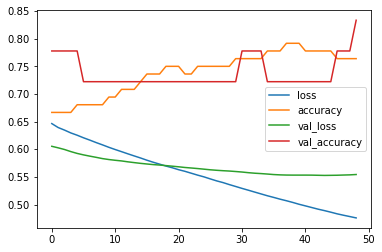

In [25]:
losses_df = pd.DataFrame(model.history.history)
losses_df.plot()

In [26]:
def f(prediction):
    if prediction > 0.5:
        return 1
    else:
        return 0

In [27]:
preds = model.predict(X_test)
preds = [f(i) for i in preds]

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89        13
         1.0       0.75      0.60      0.67         5

    accuracy                           0.83        18
   macro avg       0.80      0.76      0.78        18
weighted avg       0.83      0.83      0.83        18



## Hyperparameter Tuning:

In [29]:
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import ParameterGrid

In [30]:
def calc_loss(actual, predicted):
    bce = BinaryCrossentropy(from_logits=True)
    return bce(actual, predicted).numpy()

In [31]:
param_grid = ParameterGrid(
    {
        'hidden_layers': [3,4,5],
        'neurons': [40,50,60],
        'activation': ['relu', 'tanh', 'swish']
    }
)

In [32]:
def create_model(params):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(37, activation='relu'))
    for i in range(params['hidden_layers']):
        model.add(Dense(params['neurons'], activation=params['activation']))
        model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
y_train = y_train.reshape((72,1))

In [34]:
#function to tune the model

def tune_hyperparameters(param_grid, X_train, y_train):
    parameters = pd.DataFrame(columns=["log_loss", "params"])
    for parameter_set in param_grid:
        model = create_model(parameter_set)
        model.fit(X_train, y_train, epochs = 50, verbose=0)
        preds = model.predict(X_train, verbose=0)
        loss = calc_loss(y_train, preds)
        parameters = pd.concat([pd.DataFrame({"log_loss":loss, "params": parameter_set}), parameters], axis=0)
    # parameters = parameters.sort_values("log_loss").reset_index().iloc[0]
    min_loss = parameters['log_loss'].sort_values(ascending=False)[0]
    best_params = parameters[parameters['log_loss'] == min_loss]
    return {
    'activation': best_params.loc['activation']['params'],
    'hidden_layers': best_params.loc['hidden_layers']['params'],
    'neurons': best_params.loc['neurons']['params']
    }   
    

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

In [36]:
best_params = tune_hyperparameters(param_grid, X_train, y_train)

In [37]:
final_model = create_model(best_params)

In [38]:
final_model.fit(X_train,y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
3/3 [==============================] - 1s 100ms/step - loss: 0.6907 - accuracy: 0.4861 - val_loss: 0.6851 - val_accuracy: 0.7778
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.6906 - accuracy: 0.6250 - val_loss: 0.6765 - val_accuracy: 0.7778
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6763 - accuracy: 0.5833 - val_loss: 0.6681 - val_accuracy: 0.7222
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6651 - accuracy: 0.6389 - val_loss: 0.6586 - val_accuracy: 0.7222
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6591 - accuracy: 0.6389 - val_loss: 0.6489 - val_accuracy: 0.7222
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6593 - accuracy: 0.6111 - val_loss: 0.6395 - val_accuracy: 0.7222
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6452 - accuracy: 0.6111 - val_loss: 0.6310 - val_accuracy: 0.7222
Epoch 8/50
3/3 [==========

In [39]:
final_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 37)                0         
_________________________________________________________________
dense_164 (Dense)            (None, 37)                1406      
_________________________________________________________________
dense_165 (Dense)            (None, 40)                1520      
_________________________________________________________________
dropout_108 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 40)                1640      
_________________________________________________________________
dropout_109 (Dropout)        (None, 40)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 40)              

#### We have trained our model with the labelled data, now we generate pseudo labels for the unlabelled part of the dataset

## Self-Training

### Pseudo-labelling

In [40]:

unlabelled_df = df[df['Risk'].isna()]
unlabelled_df.head()

,Female,Age,Verification,Heterosexual,Homosexual,bicurious,bisexual,Dominant,Submisive,Switch,...,Location_B,Location_G,Location_L,Location_M,Location_K,Location_C,Location_H,Location_E,Location_O,Friends
90,0,42.9,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,47.4,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
92,0,35.2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
93,1,28.6,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
94,0,56.6,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
X_unlabelled = unlabelled_df.drop('Risk', axis = 1)

pseudo_labels = final_model.predict(X_unlabelled)

pseudo_labels

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [42]:
#gets pseudo-labels based on partially-trained model

def get_pseudo_labels(model, unlabelled_df):
    return model.predict(unlabelled_df)

In [43]:
# filters prediction based on how confident the model is in predicting the output

def get_confident_labels(confidence_level, pseudolabels):
    confident_labels = []
    for i in pseudolabels:
        value = i[0]
        if value >= confidence_level:
            confident_labels.append([value, 1])
        elif value <= 1-confidence_level:
            confident_labels.append([value, 1])
        else:
            confident_labels.append([value, 0])
    return pd.DataFrame(confident_labels, columns=["Risk", "confident"])


In [45]:

# single iteration of self-training

def self_training(labelled_df, unlabelled_df, params, min_confidence=1.00):
    if len(unlabelled_df) > 0:
        X_labelled = labelled_df.drop('Risk', axis = 1)
        y_labelled = labelled_df['Risk'].values
        y_labelled = y_labelled.reshape(y_labelled.shape[0], 1)
        
        #creating model with tuned hyperparameters
        X_labelled_train, X_labelled_test, y_labelled_train, y_labelled_test = train_test_split(X_labelled, y_labelled, test_size=0.2)
        model = create_model(params)
        # using early-stop callbacks to prevent overfitting
        model.fit(X_labelled_train, y_labelled_train, epochs=50, validation_data = (X_labelled_test, y_labelled_test), callbacks = [early_stop])

        #obtaining pseudo-labels for unlabelled data, filtering them based on confidence
        X_unlabelled = unlabelled_df.drop('Risk', axis =1)
        pseudo_labels = get_pseudo_labels(model, X_unlabelled)
        confidence_of_labels = get_confident_labels(min_confidence, pseudolabels=pseudo_labels)
        X_unlabelled = pd.concat([X_unlabelled.reset_index(), confidence_of_labels.reset_index()], axis = 1)
        new_X_labelled = X_unlabelled[X_unlabelled['confident'] == 1]
        new_X_unlabelled = X_unlabelled[X_unlabelled['confident'] == 0]
        
        return new_X_labelled.drop(['confident', 'index'], axis = 1), new_X_unlabelled.drop(['confident', 'index'], axis = 1), model
    else:
        return X_labelled, model

In [46]:
l = df.dropna()
u = df[df['Risk'].isna()]


In [47]:
# labelled dataset

l

,Female,Age,Verification,Heterosexual,Homosexual,bicurious,bisexual,Dominant,Submisive,Switch,...,Location_B,Location_G,Location_L,Location_M,Location_K,Location_C,Location_H,Location_E,Location_O,Friends
0,0,34.6,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,32.2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,33.6,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3
3,0,34.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,12
4,0,39.5,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,29.9,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
86,0,52.3,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
87,1,28.8,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
88,1,34.2,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,21


In [48]:
# unlabelled dataset

u

,Female,Age,Verification,Heterosexual,Homosexual,bicurious,bisexual,Dominant,Submisive,Switch,...,Location_B,Location_G,Location_L,Location_M,Location_K,Location_C,Location_H,Location_E,Location_O,Friends
90,0,42.9,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,47.4,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
92,0,35.2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
93,1,28.6,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
94,0,56.6,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,0,27.2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28827,0,46.4,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28828,0,28.8,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
28829,0,31.5,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# iteration 1
out = self_training(l, u, best_params, 1.00)

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 276.9577 - accuracy: 0.4028

2023-02-06 10:17:47.426876: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-02-06 10:17:47.427087: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-02-06 10:17:47.431054: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-02-06 10:17:47.436641: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-02-06 10:17:47.449687: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_02_06_10_17_47

2023-02-06 10:17:47.450921: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_02_06_10_17_47/83ff4a517c4f.trace.json.gz
2023-02-06 10:17:47.464467: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_02_06_10_17_47

2023-02-06 10:17:47.465216: I

3/3 [==============================] - 1s 133ms/step - loss: 276.9577 - accuracy: 0.4028 - val_loss: 6.4354 - val_accuracy: 0.8333
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 78.8999 - accuracy: 0.4444 - val_loss: 32.3768 - val_accuracy: 0.6111
Epoch 00002: early stopping


In [52]:
#new labelled dataset

out[0]

,Female,Age,Verification,Heterosexual,Homosexual,bicurious,bisexual,Dominant,Submisive,Switch,...,Location_G,Location_L,Location_M,Location_K,Location_C,Location_H,Location_E,Location_O,Friends,Risk
12,0,32.2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
22,0,43.4,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
23,0,37.1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
25,0,35.5,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0.0
27,0,38.8,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28719,0,47.2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
28723,0,28.4,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
28732,0,32.4,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
28737,0,46.4,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [53]:
# new unlabelled dataset

out[1]

,Female,Age,Verification,Heterosexual,Homosexual,bicurious,bisexual,Dominant,Submisive,Switch,...,Location_G,Location_L,Location_M,Location_K,Location_C,Location_H,Location_E,Location_O,Friends,Risk
0,0,42.9,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.486719e-32
1,0,47.4,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.146287e-32
2,0,35.2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.564698e-30
3,1,28.6,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.273981e-32
4,0,56.6,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2.993040e-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,0,50.5,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.416073e-32
28735,0,43.9,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.668703e-30
28736,0,27.2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.839965e-30
28738,0,28.8,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,9.960524e-30


In [54]:
#iteration 2
out = self_training(out[0], out[1], best_params, 1.00)

Epoch 1/50
 72/210 [=========>....................] - ETA: 0s - loss: 7.5769 - accuracy: 0.9705 

2023-02-06 10:17:53.606776: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-02-06 10:17:53.606827: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-02-06 10:17:53.624933: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-02-06 10:17:53.626588: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-02-06 10:17:53.628673: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_02_06_10_17_53

2023-02-06 10:17:53.629997: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_02_06_10_17_53/83ff4a517c4f.trace.json.gz
2023-02-06 10:17:53.633497: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_02_06_10_17_53

2023-02-06 10:17:53.634339: I

210/210 [==============================] - 1s 3ms/step - loss: 2.9070 - accuracy: 0.9884 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0256 - accuracy: 0.9990 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 00002: early stopping


In [60]:
len(out[1])

0

#### So, all the unlabelled data has been labelled as length of unlabelled_df is 0

#### Stopped at 2 iterations, because we are already got a good accuracy for our model

In [56]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 187ms/step - loss: 0.6517 - accuracy: 0.7222


[0.6517080664634705, 0.7222222089767456]